# PCA Pairs Trading in the Korea Equities Market

#### Import Packages

In [606]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### System Setting

In [607]:
# Prevent Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Pickle 로딩 및 데이터 전처리

In [211]:
ticker_series = pd.read_pickle("./kse_18_20_ticker.pkl")
ticker_series

A005930        삼성전자
A000660      SK하이닉스
A207940    삼성바이오로직스
A035420       NAVER
A068270        셀트리온
             ...   
A005030        부산주공
A019490        하이트론
A109070         컨버즈
A025890        한국주강
A008500        일정실업
Name: 0, Length: 776, dtype: object

In [769]:
sector_df = pd.read_pickle("./kse_sector.pkl")
sector_df

,A005930,A000660,A207940,A035420,A068270,A051910,A051900,A005380,A006400,A028260,...,A012600,A015260,A000950,A002420,A010580,A019490,A005030,A025890,A109070,A008500
세세분류,통신 및 방송 장비 제조업,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",생물학적 제제 제조업,포털 및 기타 인터넷 정보매개 서비스업,생물학적 제제 제조업,석유화학계 기초 화학물질 제조업,"치약, 비누 및 기타 세제 제조업",승용차 및 기타 여객용 자동차 제조업,축전지 제조업,기타 전문 도매업,...,사무용 기계 및 장비 제조업,인쇄회로기판용 적층판 제조업,면 방적업,영화관 운영업,자동차 엔진용 신품 부품 제조업,영상 및 음향기기 제조업,자동차 엔진용 신품 부품 제조업,특수 목적용 기계 제조업,"골판지, 종이 상자 및 종이 용기 제조업",편조원단 제조업
세분류,통신 및 방송 장비 제조업,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",기초 의약물질 및 생물학적 제제 제조업,포털 및 기타 인터넷 정보매개 서비스업,기초 의약물질 및 생물학적 제제 제조업,기초 유기 화학물질 제조업,"세제, 화장품 및 광택제 제조업",자동차 제조업,일차전지 및 축전지 제조업,기타 전문 도매업,...,사무용 기계 및 장비 제조업,인쇄회로기판 및 전자부품 실장기판 제조업,방적 및 가공사 제조업,영화 및 비디오물 상영업,자동차 엔진용 신품 부품 제조업,영상 및 음향기기 제조업,자동차 엔진용 신품 부품 제조업,특수 목적용 기계 제조업,"골판지, 종이 상자 및 종이 용기 제조업",편조원단 제조업
소분류,통신 및 방송 장비 제조업,반도체 제조업,기초 의약물질 및 생물학적 제제 제조업,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",기초 의약물질 및 생물학적 제제 제조업,기초 화학물질 제조업,기타 화학제품 제조업,자동차용 엔진 및 자동차 제조업,일차전지 및 축전지 제조업,기타 전문 도매업,...,일반 목적용 기계 제조업,전자부품 제조업,방적 및 가공사 제조업,"영화, 비디오물, 방송프로그램 제작 및 배급업",자동차 신품 부품 제조업,영상 및 음향기기 제조업,자동차 신품 부품 제조업,특수 목적용 기계 제조업,"골판지, 종이 상자 및 종이 용기 제조업",편조원단 제조업
중분류,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업","전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",의료용 물질 및 의약품 제조업,정보서비스업,의료용 물질 및 의약품 제조업,화학물질 및 화학제품 제조업; 의약품 제외,화학물질 및 화학제품 제조업; 의약품 제외,자동차 및 트레일러 제조업,전기장비 제조업,도매 및 상품 중개업,...,기타 기계 및 장비 제조업,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",섬유제품 제조업; 의복제외,영상ㆍ오디오 기록물 제작 및 배급업,자동차 및 트레일러 제조업,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",자동차 및 트레일러 제조업,기타 기계 및 장비 제조업,"펄프, 종이 및 종이제품 제조업",섬유제품 제조업; 의복제외
대분류,제조업,제조업,제조업,"출판, 영상, 방송통신 및 정보서비스업",제조업,제조업,제조업,제조업,제조업,도매 및 소매업,...,제조업,제조업,제조업,"출판, 영상, 방송통신 및 정보서비스업",제조업,제조업,제조업,제조업,제조업,제조업


In [1007]:
df = pd.read_pickle("./kse_18_20.pkl")
end_date = datetime.datetime(2019, 7, 1)
df = df.loc[df.index<end_date, :]
df

Item          수정주가(원)                                                         \
Symbol        A000020   A000040    A000050    A000060     A000070    A000080   
Date                                                                           
2018-01-02  9870.0000 1985.0000 13850.0000 23350.0000 121500.0000 24400.0000   
2018-01-03 10000.0000 1985.0000 13750.0000 23350.0000 123500.0000 24800.0000   
2018-01-04  9750.0000 1985.0000 13750.0000 22700.0000 122000.0000 24550.0000   
2018-01-05  9910.0000 1985.0000 13550.0000 23250.0000 129500.0000 24400.0000   
2018-01-08  9950.0000 1985.0000 13450.0000 23000.0000 129000.0000 23850.0000   
...               ...       ...        ...        ...         ...        ...   
2019-06-24  9880.0000 2127.0000 10500.0000 21050.0000  75000.0000 20700.0000   
2019-06-25  9860.0000 2164.0000 10550.0000 20600.0000  74000.0000 21000.0000   
2019-06-26  9840.0000 2201.0000 10500.0000 20650.0000  73400.0000 20850.0000   
2019-06-27  9760.0000 2209.0000 10450.0000 20750.0000  74900.0000 20500.0000   
2019-06-28  9680.0000 2192.0000 10450.0000 20700.0000  73700.0000 20350.0000   

Item                                                     ...  \
Symbol        A000100     A000120    A000140    A000150  ...   
Date                                                     ...   
2018-01-02 39758.0000 144000.0000 10000.0000 89408.0000  ...   
2018-01-03 39483.0000 145000.0000 10200.0000 90590.0000  ...   
2018-01-04 38933.0000 145000.0000  9970.0000 93741.0000  ...   
2018-01-05 39849.0000 141500.0000 10050.0000 92559.0000  ...   
2018-01-08 39391.0000 139000.0000 10000.0000 90590.0000  ...   
...               ...         ...        ...        ...  ...   
2019-06-24 47579.0000 153000.0000  9160.0000 80743.0000  ...   
2019-06-25 46717.0000 144500.0000  9250.0000 81137.0000  ...   
2019-06-26 47291.0000 133000.0000  9240.0000 79955.0000  ...   
2019-06-27 45855.0000 132500.0000  9130.0000 79955.0000  ...   
2019-06-28 46813.0000 134500.0000  9080.0000 79167.0000  ...   

Item       시가총액 (52주 평균)(백만원)                                                \
Symbol                A300720     A306200      A307950 A308170      A316140   
Date                                                                          
2018-01-02                nan         nan          nan     nan          nan   
2018-01-03                nan         nan          nan     nan          nan   
2018-01-04                nan         nan          nan     nan          nan   
2018-01-05                nan         nan          nan     nan          nan   
2018-01-08                nan         nan          nan     nan          nan   
...                       ...         ...          ...     ...          ...   
2019-06-24        560352.0000 180780.0000 1520050.0000     nan 9685918.0000   
2019-06-25        560252.0000 180930.0000 1516062.0000     nan 9683746.0000   
2019-06-26        560154.0000 181053.0000 1512203.0000     nan 9681991.0000   
2019-06-27        560065.0000 181178.0000 1509200.0000     nan 9681005.0000   
2019-06-28        559921.0000 181295.0000 1505667.0000     nan 9679679.0000   

Item                                                
Symbol     A317400 A322000 A336260 A336370 A344820  
Date                                                
2018-01-02     nan     nan     nan     nan     nan  
2018-01-03     nan     nan     nan     nan     nan  
2018-01-04     nan     nan     nan     nan     nan  
2018-01-05     nan     nan     nan     nan     nan  
2018-01-08     nan     nan     nan     nan     nan  
...            ...     ...     ...     ...     ...  
2019-06-24     nan     nan     nan     nan     nan  
2019-06-25     nan     nan     nan     nan     nan  
2019-06-26     nan     nan     nan     nan     nan  
2019-06-27     nan     nan     nan     nan     nan  
2019-06-28     nan     nan     nan     nan     nan  

[365 rows x 1552 columns]

In [1008]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-02 to 2019-06-28
Columns: 1552 entries, (수정주가(원), A000020) to (시가총액 (52주 평균)(백만원), A344820)
dtypes: float64(1552)
memory usage: 4.3 MB


In [1009]:
df.describe()

Item      수정주가(원)                                                         \
Symbol    A000020   A000040    A000050    A000060     A000070    A000080   
count    365.0000  365.0000   365.0000   365.0000    365.0000   365.0000   
mean   10430.7945 2315.3342 12476.6849 21292.6027  96726.0274 19162.8767   
std     1021.9066  264.2211  1516.8483  1965.4642  15811.3468  2331.6294   
min     7900.0000 1884.0000  9990.0000 17650.0000  71700.0000 15300.0000   
25%     9610.0000 2115.0000 11100.0000 19550.0000  83300.0000 17250.0000   
50%    10000.0000 2270.0000 12850.0000 21450.0000  94800.0000 18450.0000   
75%    11400.0000 2448.0000 13800.0000 22800.0000 111000.0000 21100.0000   
max    13150.0000 3069.0000 15900.0000 25600.0000 145500.0000 24900.0000   

Item                                                  ... 시가총액 (52주 평균)(백만원)  \
Symbol    A000100     A000120    A000140     A000150  ...            A300720   
count    365.0000    365.0000   365.0000    365.0000  ...           219.0000   
mean   42918.1260 155700.0000  8556.5205  86525.7534  ...        555529.6667   
std     3351.1553  14055.0722   999.8781   9031.4783  ...         20235.9908   
min    30688.0000 122000.0000  6460.0000  71920.0000  ...        493251.0000   
25%    40216.0000 148000.0000  7880.0000  79167.0000  ...        547242.5000   
50%    42689.0000 155500.0000  8440.0000  84288.0000  ...        556958.0000   
75%    45568.0000 165500.0000  9470.0000  92953.0000  ...        561734.0000   
max    50834.0000 190500.0000 10500.0000 112646.0000  ...        592579.0000   

Item                                                                           \
Symbol     A306200      A307950 A308170       A316140 A317400 A322000 A336260   
count     180.0000      64.0000  0.0000       94.0000  0.0000  0.0000  0.0000   
mean   179424.6778 1645664.3750     nan  9939773.9255     nan     nan     nan   
std      5400.1347   90316.7319     nan   273367.5135     nan     nan     nan   
min    173398.0000 1505667.0000     nan  9679679.0000     nan     nan     nan   
25%    177256.7500 1550408.0000     nan  9724432.2500     nan     nan     nan   
50%    177807.0000 1671446.0000     nan  9852764.5000     nan     nan     nan   
75%    179873.2500 1724751.5000     nan 10086208.0000     nan     nan     nan   
max    207050.0000 1862700.0000     nan 10661576.0000     nan     nan     nan   

Item                    
Symbol A336370 A344820  
count   0.0000  0.0000  
mean       nan     nan  
std        nan     nan  
min        nan     nan  
25%        nan     nan  
50%        nan     nan  
75%        nan     nan  
max        nan     nan  

[8 rows x 1552 columns]

In [1010]:
df = df.dropna(axis=1)
df

Item          수정주가(원)                                                         \
Symbol        A000020   A000040    A000050    A000060     A000070    A000080   
Date                                                                           
2018-01-02  9870.0000 1985.0000 13850.0000 23350.0000 121500.0000 24400.0000   
2018-01-03 10000.0000 1985.0000 13750.0000 23350.0000 123500.0000 24800.0000   
2018-01-04  9750.0000 1985.0000 13750.0000 22700.0000 122000.0000 24550.0000   
2018-01-05  9910.0000 1985.0000 13550.0000 23250.0000 129500.0000 24400.0000   
2018-01-08  9950.0000 1985.0000 13450.0000 23000.0000 129000.0000 23850.0000   
...               ...       ...        ...        ...         ...        ...   
2019-06-24  9880.0000 2127.0000 10500.0000 21050.0000  75000.0000 20700.0000   
2019-06-25  9860.0000 2164.0000 10550.0000 20600.0000  74000.0000 21000.0000   
2019-06-26  9840.0000 2201.0000 10500.0000 20650.0000  73400.0000 20850.0000   
2019-06-27  9760.0000 2209.0000 10450.0000 20750.0000  74900.0000 20500.0000   
2019-06-28  9680.0000 2192.0000 10450.0000 20700.0000  73700.0000 20350.0000   

Item                                                     ...  \
Symbol        A000100     A000120    A000140    A000150  ...   
Date                                                     ...   
2018-01-02 39758.0000 144000.0000 10000.0000 89408.0000  ...   
2018-01-03 39483.0000 145000.0000 10200.0000 90590.0000  ...   
2018-01-04 38933.0000 145000.0000  9970.0000 93741.0000  ...   
2018-01-05 39849.0000 141500.0000 10050.0000 92559.0000  ...   
2018-01-08 39391.0000 139000.0000 10000.0000 90590.0000  ...   
...               ...         ...        ...        ...  ...   
2019-06-24 47579.0000 153000.0000  9160.0000 80743.0000  ...   
2019-06-25 46717.0000 144500.0000  9250.0000 81137.0000  ...   
2019-06-26 47291.0000 133000.0000  9240.0000 79955.0000  ...   
2019-06-27 45855.0000 132500.0000  9130.0000 79955.0000  ...   
2019-06-28 46813.0000 134500.0000  9080.0000 79167.0000  ...   

Item       시가총액 (52주 평균)(백만원)                                       \
Symbol                A267290     A268280      A271560     A271980   
Date                                                                 
2018-01-02        163383.0000 308852.0000 3945008.0000 659044.0000   
2018-01-03        163424.0000 308799.0000 3946407.0000 659310.0000   
2018-01-04        163466.0000 308761.0000 3946794.0000 659562.0000   
2018-01-05        163510.0000 308734.0000 3947338.0000 659929.0000   
2018-01-08        163552.0000 308697.0000 3948360.0000 660280.0000   
...                       ...         ...          ...         ...   
2019-06-24        178481.0000 349855.0000 4309616.0000 632670.0000   
2019-06-25        178167.0000 350181.0000 4299468.0000 632703.0000   
2019-06-26        177876.0000 350532.0000 4290352.0000 632751.0000   
2019-06-27        177605.0000 350884.0000 4281639.0000 632733.0000   
2019-06-28        177297.0000 351221.0000 4272443.0000 632757.0000   

Item                                                                     \
Symbol         A272450     A272550     A280360     A281820      A282330   
Date                                                                      
2018-01-02 806800.0000 299213.0000 667430.0000 449747.0000 3877932.0000   
2018-01-03 808406.0000 299518.0000 666768.0000 447743.0000 3854311.0000   
2018-01-04 809559.0000 300004.0000 666273.0000 445443.0000 3831435.0000   
2018-01-05 810833.0000 300623.0000 665755.0000 443551.0000 3810621.0000   
2018-01-08 811105.0000 300865.0000 665170.0000 441380.0000 3791088.0000   
...                ...         ...         ...         ...          ...   
2019-06-24 646935.0000 251557.0000 895642.0000 290855.0000 3340626.0000   
2019-06-25 646378.0000 251624.0000 897098.0000 290163.0000 3340238.0000   
2019-06-26 645741.0000 251690.0000 898584.0000 289527.0000 3340027.0000   
2019-06-27 645337.0000 251754.0000 900045.0000 288920.0000 3341296.0000   
2019-06-28 644810.0000 251

In [1011]:
df_price = df['수정주가(원)']
df_price

Symbol,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150,...,A267290,A268280,A271560,A271980,A272450,A272550,A280360,A281820,A282330,A282690
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,9870.0000,1985.0000,13850.0000,23350.0000,121500.0000,24400.0000,39758.0000,144000.0000,10000.0000,89408.0000,...,28587.0000,57600.0000,107000.0000,46522.0000,27650.0000,20450.0000,147000.0000,20700.0000,210500.0000,10300.0000
2018-01-03,10000.0000,1985.0000,13750.0000,23350.0000,123500.0000,24800.0000,39483.0000,145000.0000,10200.0000,90590.0000,...,28827.0000,58100.0000,104000.0000,46879.0000,27750.0000,21550.0000,151500.0000,20750.0000,202500.0000,11150.0000
2018-01-04,9750.0000,1985.0000,13750.0000,22700.0000,122000.0000,24550.0000,38933.0000,145000.0000,9970.0000,93741.0000,...,28867.0000,58500.0000,101000.0000,46808.0000,27600.0000,21900.0000,153000.0000,20250.0000,200500.0000,11150.0000
2018-01-05,9910.0000,1985.0000,13550.0000,23250.0000,129500.0000,24400.0000,39849.0000,141500.0000,10050.0000,92559.0000,...,28947.0000,58800.0000,101500.0000,47737.0000,27750.0000,22200.0000,152500.0000,20450.0000,200000.0000,11150.0000
2018-01-08,9950.0000,1985.0000,13450.0000,23000.0000,129000.0000,23850.0000,39391.0000,139000.0000,10000.0000,90590.0000,...,28907.0000,58500.0000,103000.0000,47666.0000,27200.0000,21600.0000,151500.0000,19950.0000,199000.0000,10900.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,9880.0000,2127.0000,10500.0000,21050.0000,75000.0000,20700.0000,47579.0000,153000.0000,9160.0000,80743.0000,...,24983.0000,76500.0000,91200.0000,39000.0000,22450.0000,17550.0000,172000.0000,14800.0000,198000.0000,13350.0000
2019-06-25,9860.0000,2164.0000,10550.0000,20600.0000,74000.0000,21000.0000,46717.0000,144500.0000,9250.0000,81137.0000,...,24583.0000,76900.0000,92100.0000,39100.0000,21550.0000,17550.0000,174000.0000,14750.0000,192000.0000,13450.0000
2019-06-26,9840.0000,2201.0000,10500.0000,20650.0000,73400.0000,20850.0000,47291.0000,133000.0000,9240.0000,79955.0000,...,24583.0000,77900.0000,91500.0000,38700.0000,20950.0000,17550.0000,174500.0000,15200.0000,194000.0000,13550.0000


## PCA 분석

### Normalization return process

In [1012]:
df_return = df_price.pct_change()
df_return = df_return.dropna(axis=0)
df_return

Symbol,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150,...,A267290,A268280,A271560,A271980,A272450,A272550,A280360,A281820,A282330,A282690
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.0132,0.0000,-0.0072,0.0000,0.0165,0.0164,-0.0069,0.0069,0.0200,0.0132,...,0.0084,0.0087,-0.0280,0.0077,0.0036,0.0538,0.0306,0.0024,-0.0380,0.0825
2018-01-04,-0.0250,0.0000,0.0000,-0.0278,-0.0121,-0.0101,-0.0139,0.0000,-0.0225,0.0348,...,0.0014,0.0069,-0.0288,-0.0015,-0.0054,0.0162,0.0099,-0.0241,-0.0099,0.0000
2018-01-05,0.0164,0.0000,-0.0145,0.0242,0.0615,-0.0061,0.0235,-0.0241,0.0080,-0.0126,...,0.0028,0.0051,0.0050,0.0198,0.0054,0.0137,-0.0033,0.0099,-0.0025,0.0000
2018-01-08,0.0040,0.0000,-0.0074,-0.0108,-0.0039,-0.0225,-0.0115,-0.0177,-0.0050,-0.0213,...,-0.0014,-0.0051,0.0148,-0.0015,-0.0198,-0.0270,-0.0066,-0.0244,-0.0050,-0.0224
2018-01-09,-0.0181,0.0000,0.0112,0.0065,-0.0039,0.0273,0.0256,0.0036,0.0000,0.0348,...,-0.0028,-0.0291,0.0340,-0.0510,-0.0092,0.0093,-0.0231,0.0201,0.0352,0.0688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,0.0010,0.0076,-0.0047,0.0024,-0.0066,-0.0143,-0.0099,-0.0097,-0.0161,0.0099,...,0.0000,-0.0192,-0.0055,0.0143,0.0045,-0.0223,-0.0086,-0.0231,-0.0246,-0.0037
2019-06-25,-0.0020,0.0174,0.0048,-0.0214,-0.0133,0.0145,-0.0181,-0.0556,0.0098,0.0049,...,-0.0160,0.0052,0.0099,0.0026,-0.0401,0.0000,0.0116,-0.0034,-0.0303,0.0075
2019-06-26,-0.0020,0.0171,-0.0047,0.0024,-0.0081,-0.0071,0.0123,-0.0796,-0.0011,-0.0146,...,0.0000,0.0130,-0.0065,-0.0102,-0.0278,0.0000,0.0029,0.0305,0.0104,0.0074


In [1013]:
for col in df_return.columns:
    df_return[col] = (df_return[col] - df_return[col].mean()) / df_return[col].std()
df_return

Symbol,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150,...,A267290,A268280,A271560,A271980,A272450,A272550,A280360,A281820,A282330,A282690
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.6066,-0.0226,-0.3591,0.0110,0.7046,1.0331,-0.2986,0.3255,1.5750,0.6294,...,0.5013,0.6623,-1.0373,0.2266,0.1574,2.9040,1.5396,0.0854,-1.4633,4.4774
2018-01-04,-1.1748,-0.0226,0.0329,-1.6256,-0.4457,-0.5987,-0.5713,-0.0017,-1.7452,1.6475,...,0.0955,0.5103,-1.0673,-0.0431,-0.1947,0.8873,0.4762,-0.7659,-0.3901,-0.0498
2018-01-05,0.7578,-0.0226,-0.7567,1.4356,2.5146,-0.3540,0.8853,-1.1390,0.6405,-0.5901,...,0.1756,0.3615,0.1848,0.5841,0.2284,0.7507,-0.2000,0.3250,-0.1084,-0.0498
2018-01-08,0.1803,-0.0226,-0.3678,-0.6212,-0.1125,-1.3668,-0.4765,-0.8342,-0.3739,-0.9992,...,-0.0648,-0.5049,0.5488,-0.0423,-0.7574,-1.4366,-0.3688,-0.7772,-0.2040,-1.2799
2018-01-09,-0.8524,-0.0226,0.6382,0.3945,-0.1131,1.7026,0.9655,0.1677,0.0143,1.6475,...,-0.1451,-2.5338,1.2602,-1.4955,-0.3425,0.5123,-1.2183,0.6517,1.3288,3.7249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,0.0392,0.2698,-0.2244,0.1510,-0.2236,-0.8579,-0.4164,-0.4592,-1.2429,0.4706,...,0.0152,-1.7014,-0.2006,0.4213,0.1909,-1.1818,-0.4761,-0.7339,-0.9530,-0.2545
2019-06-25,-0.1026,0.6484,0.2913,-1.2459,-0.4934,0.9160,-0.7341,-2.6193,0.7810,0.2356,...,-0.9119,0.3700,0.3670,0.0766,-1.5486,0.0150,0.5648,-0.1006,-1.1694,0.3611
2019-06-26,-0.1028,0.6370,-0.2244,0.1537,-0.2833,-0.4176,0.4482,-3.7515,-0.0700,-0.6826,...,0.0152,1.0285,-0.2400,-0.2990,-1.0705,0.0150,0.1154,0.9875,0.3842,0.3581


### Correlation Heatmap

In [1014]:
corr = df_return.corr()
corr.iloc[:10, :10]

Symbol,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150
Symbol,,,,,,,,,,
A000020,1.0000,0.1299,0.1782,0.1200,0.1494,0.1558,0.1988,0.1541,0.2285,0.0656
A000040,0.1299,1.0000,0.1060,0.0708,0.0929,0.0284,0.1081,0.0697,0.1439,0.0502
A000050,0.1782,0.1060,1.0000,0.0380,0.2216,0.2137,0.0303,0.1706,0.1721,0.1669
A000060,0.1200,0.0708,0.0380,1.0000,0.0772,0.1342,0.0268,0.0333,0.1623,0.1065
A000070,0.1494,0.0929,0.2216,0.0772,1.0000,0.1881,0.1695,0.1989,0.0873,0.1454
A000080,0.1558,0.0284,0.2137,0.1342,0.1881,1.0000,0.0614,0.1369,0.4600,0.2062
A000100,0.1988,0.1081,0.0303,0.0268,0.1695,0.0614,1.0000,0.0912,0.1051,0.0334
A000120,0.1541,0.0697,0.1706,0.0333,0.1989,0.1369,0.0912,1.0000,0.1534,0.1006
A000140,0.2285,0.1439,0.1721,0.1623,0.0873,0.4600,0.1051,0.1534,1.0000,0.1851


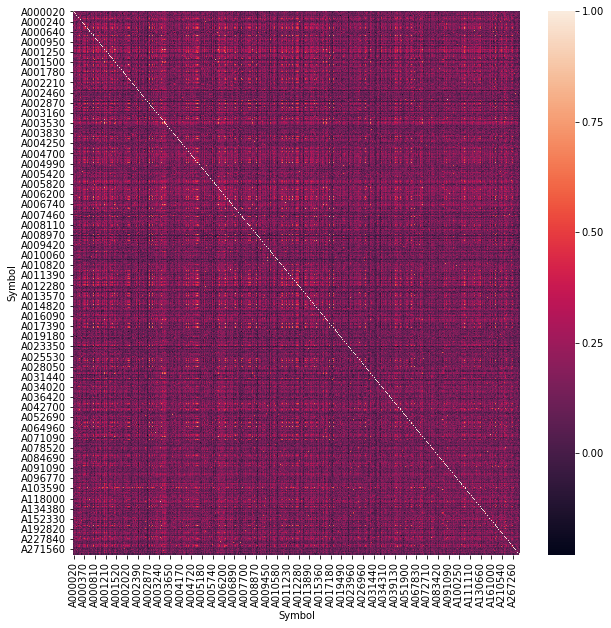

In [1015]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

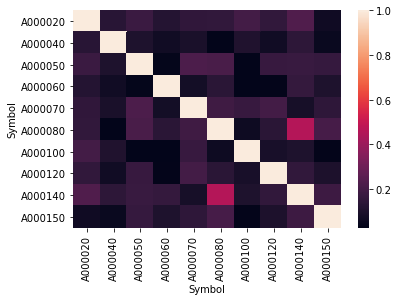

In [1016]:
sns.heatmap(corr.iloc[:10, :10])

In [1017]:
pca = PCA()
pca.fit(df_return)
return_pca = pca.transform(df_return)
return_pca.shape

(364, 364)

### Eigen Portfolio

In [1018]:
df_return.mul(pca.components_[0]).sum(axis=1)

Date
2018-01-03   -3.3562
2018-01-04    5.3147
2018-01-05   -8.8637
2018-01-08   -0.1700
2018-01-09   -0.1310
               ...  
2019-06-24   -1.6658
2019-06-25    6.2130
2019-06-26    3.5525
2019-06-27   -0.0306
2019-06-28    5.5932
Length: 364, dtype: float64

In [1019]:
print("Variance Explanation Ratio")
print("1st Eigen Vector: {:.4f}".format(pca.explained_variance_ratio_[0]))


Variance Explanation Ratio
1st Eigen Vector: 0.1615


In [1020]:
eig1 = pca.components_[0] / pca.components_[0].sum()

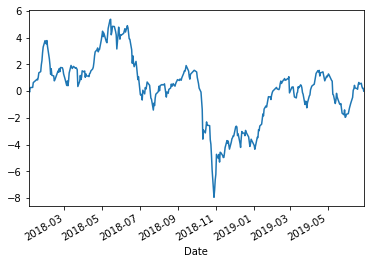

In [1021]:
ep_return_df = df_return.mul(eig1, axis=1)
ep_return = ep_return_df.sum(axis=1)
ep_return.cumsum().plot()

### Market Portfolio

In [1022]:
df_cap = df['시가총액 (52주 평균)(백만원)']
df_cap_w = df_cap.divide(df_cap.sum(axis=1), axis=0)
df_cap_w.sum(axis=1)

Date
2018-01-02   1.0000
2018-01-03   1.0000
2018-01-04   1.0000
2018-01-05   1.0000
2018-01-08   1.0000
              ...  
2019-06-24   1.0000
2019-06-25   1.0000
2019-06-26   1.0000
2019-06-27   1.0000
2019-06-28   1.0000
Length: 365, dtype: float64

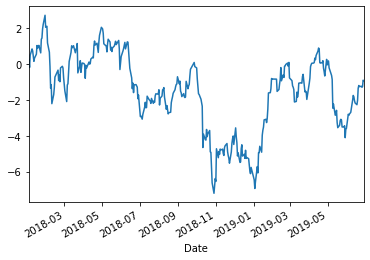

In [1023]:
mp_return_df = df_return * df_cap_w[1:]
mp_return = mp_return_df.sum(axis=1)
mp_return.cumsum().plot()

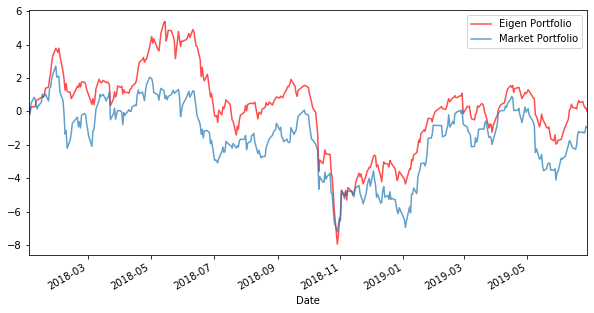

In [1024]:
plt.figure(figsize=(10, 5))
ep_return.cumsum().plot(color='red', alpha=.7, label='Eigen Portfolio')
mp_return.cumsum().plot(alpha=.7, label='Market Portfolio')
plt.legend()

#### Eigen Vector 분석

Text(0, 0.5, 'Ratio of Variance Explanation')

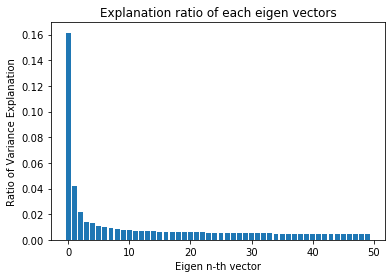

In [1025]:
eig_lim = 50
plt.bar(range(eig_lim), pca.explained_variance_ratio_[:eig_lim])
plt.title('Explanation ratio of each eigen vectors')
plt.xlabel('Eigen n-th vector')
plt.ylabel('Ratio of Variance Explanation')

Text(0, 0.5, 'Ratio of Variance Explanation')

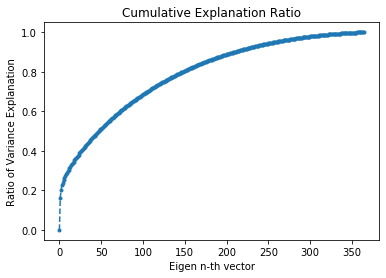

In [1026]:
eig_lim = len(pca.explained_variance_ratio_)
plt.plot(range(eig_lim + 1), [0] + list(pca.explained_variance_ratio_[:eig_lim].cumsum()), marker='o', linestyle='--', markersize=3)
plt.title('Cumulative Explanation Ratio')
plt.xlabel('Eigen n-th vector')
plt.ylabel('Ratio of Variance Explanation')

In [1027]:
eig_lim = 5
print("Explanation Ratio of {} Eigen vectors: {:.3f}".format(eig_lim, pca.explained_variance_ratio_[:eig_lim].sum()))

Explanation Ratio of 5 Eigen vectors: 0.252


In [1028]:
df_eig_loading = pd.DataFrame()
for i in range(len(pca.components_)):
    df_eig_loading[i] = pd.Series(pca.components_[i])
df_eig_loading.index = df_return.columns
df_eig_loading

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,-0.0399,-0.0298,-0.0648,-0.0432,0.0188,-0.0844,-0.0305,0.0224,-0.0012,-0.0022,...,0.0550,0.0029,-0.0234,-0.0635,-0.0255,-0.0138,0.0736,0.0061,-0.0310,-0.0141
A000040,-0.0151,-0.0281,-0.0013,0.0192,0.0383,-0.0761,-0.0106,-0.0115,0.0205,0.0242,...,-0.0106,0.0337,0.0228,-0.0218,0.0297,-0.0148,-0.0408,-0.0766,0.0491,-0.0044
A000050,-0.0357,-0.0117,-0.0024,-0.0197,-0.0153,0.0011,0.0489,-0.0600,-0.0082,-0.0431,...,0.0152,-0.0146,-0.0096,-0.0207,0.0006,-0.0601,-0.0552,-0.0326,-0.0246,-0.1115
A000060,-0.0172,-0.0313,0.0627,-0.0003,-0.0142,-0.0456,-0.0942,-0.0362,-0.0175,0.0476,...,0.0093,0.0148,0.0045,0.0069,-0.0259,-0.0270,0.0218,-0.0139,-0.0095,0.0248
A000070,-0.0330,-0.0133,0.0426,-0.0668,-0.0109,0.0162,0.0754,-0.0499,0.0474,-0.0191,...,-0.0120,0.0256,-0.0216,0.0614,-0.0404,-0.0314,-0.0003,-0.0262,-0.0001,0.0194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A272550,-0.0295,-0.0146,-0.0109,-0.0234,-0.0259,-0.0218,0.0336,0.0150,0.0498,-0.0133,...,-0.0281,-0.0189,0.0510,0.0230,-0.0250,0.0042,-0.0228,-0.0240,0.0022,0.0043
A280360,-0.0198,-0.0186,0.0144,0.0037,0.0005,0.0059,-0.0200,-0.0103,0.0595,-0.0142,...,-0.0464,0.0247,0.0116,-0.0227,0.0218,-0.0602,0.0830,0.0056,-0.0500,-0.0455
A281820,-0.0354,-0.0405,-0.0220,0.0656,0.0285,0.0537,-0.0205,-0.0615,0.0100,0.0160,...,0.0381,-0.0742,-0.0010,0.0032,0.0463,0.0525,-0.0082,0.0209,-0.0284,0.0294


[Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '소매업; 자동차 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '소매업; 자동차 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '전문 서비스업'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '도매 및 상품 중개업'),
 Text(0, 0, '전문 서비스업'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '소매업; 자동차 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '사업지원 서비스업'),
 Text(0, 0, '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'),
 Text(0, 0, '스포츠 및 오락관련 서비스업'),
 Text(0, 0, '음식점 및 주점업'),
 Text(0, 0, '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'),
 Text(0, 0, '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'),
 Text(0, 0, '종합 건설업'),
 Text(0, 0, '고무 및 플라스틱제품 제조업'),
 Text(0, 0, '영상ㆍ오디오 기록물 제작 및 배급업'),
 Text(0, 0, '사업지원 서비스업'),
 Text(0, 0, '자동차 및 트레일러 제조업'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '의복, 의복 액세서리 및 모피제품 제

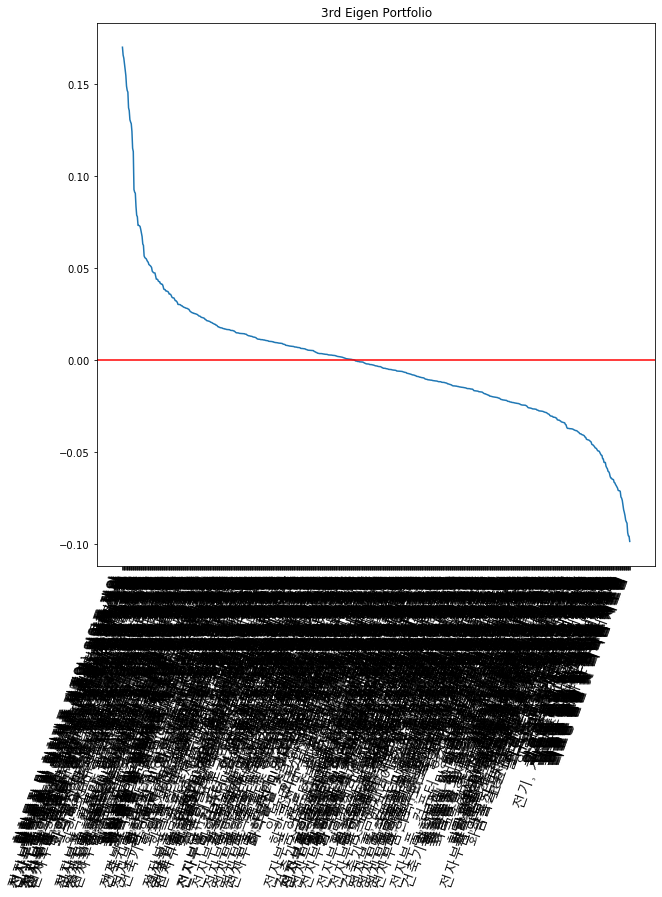

In [1340]:
import matplotlib
from matplotlib.font_manager import FontProperties
%matplotlib inline

# matplotlib.rc('font', family='HYsanB') 

font_path = 'C:/Windows/Fonts/H2GTRM.TTF'
fontprop = FontProperties(fname=font_path, size=15)
n_th = 5
df_eig_loading = df_eig_loading.sort_values(by=[n_th], ascending=False)

f, ax = plt.subplots(1,1, figsize=(10,10))
x = df_eig_loading.index[:]
y = df_eig_loading[n_th][:]

# x = df_eig_loading.index[-10:]
# y = df_eig_loading[n_th][-10:]

xx = list(sector_df.loc['중분류', x])

ax.set_title('3rd Eigen Portfolio')
ax.plot(x, y)
ax.axhline(0, color='r')
ax.set_xticklabels(xx, rotation=70, ha='right', fontproperties=fontprop)

### Linear Regression

#### 모든 주식의 추정된 회귀계수(Coefficients) Matrix 생성

In [1037]:
df_eig = pd.DataFrame()
eig_lim = 5
for i in range(eig_lim):
    df_eig[i] = df_return.mul(pca.components_[i], axis=1).sum(axis=1)
df_eig

,0,1,2,3,4
Date,,,,,
2018-01-03,-3.3562,-0.0212,-4.4415,3.7050,2.9445
2018-01-04,5.3147,5.9292,0.6041,4.8531,3.0507
2018-01-05,-8.8637,-6.2446,-1.3504,1.1190,7.2550
2018-01-08,-0.1700,-1.4747,4.3801,1.3941,5.5106
2018-01-09,-0.1310,-2.1565,5.3132,-1.9076,-1.5034
...,...,...,...,...,...
2019-06-24,-1.6658,3.8060,3.5024,-0.8052,2.7900
2019-06-25,6.2130,-0.0130,-0.4987,2.1835,-1.3049
2019-06-26,3.5525,0.0132,0.1012,0.4124,2.1349


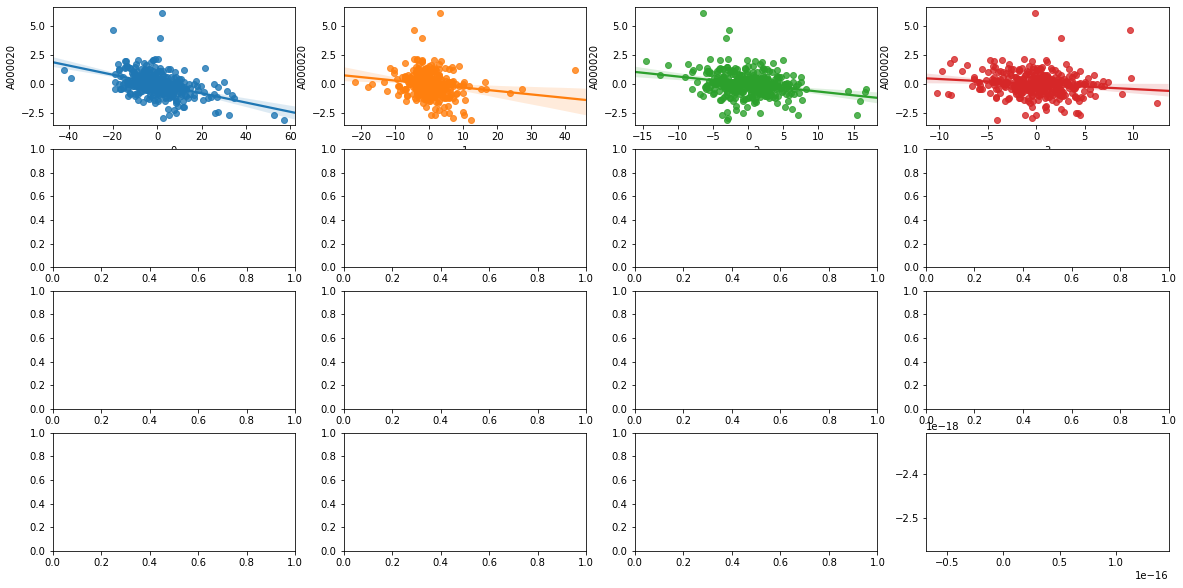

In [1038]:
# 각 변수(시간)별 선형회귀 그래프
fig, axs = plt.subplots(figsize=(20,10), ncols=4, nrows=4)
features = df_eig.columns[:-1]  # label 을 제외한 컬럼(종속 변수)
for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=df_eig[feature], y=df_return.iloc[:, 0], ax=axs[row][col])

In [1039]:
df_reg = df_eig.copy()
df_reg = sm.add_constant(df_reg)
df_reg

C:\Users\USER\Anaconda3\envs\py36_ml\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,0,1,2,3,4
Date,,,,,,
2018-01-03,1.0000,-3.3562,-0.0212,-4.4415,3.7050,2.9445
2018-01-04,1.0000,5.3147,5.9292,0.6041,4.8531,3.0507
2018-01-05,1.0000,-8.8637,-6.2446,-1.3504,1.1190,7.2550
2018-01-08,1.0000,-0.1700,-1.4747,4.3801,1.3941,5.5106
2018-01-09,1.0000,-0.1310,-2.1565,5.3132,-1.9076,-1.5034
...,...,...,...,...,...,...
2019-06-24,1.0000,-1.6658,3.8060,3.5024,-0.8052,2.7900
2019-06-25,1.0000,6.2130,-0.0130,-0.4987,2.1835,-1.3049
2019-06-26,1.0000,3.5525,0.0132,0.1012,0.4124,2.1349


#### 개별 주식의 회귀분석 결과 예시

In [1040]:
# tic = ticker_series[ticker_series == '삼성전자'].index[0]
stock_idx = 3
print(ticker_series[df_return.columns[stock_idx]])
results = sm.OLS(df_return.iloc[:,stock_idx] ,df_reg).fit()

메리츠화재


In [1041]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                A000060   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     10.82
Date:                Wed, 13 May 2020   Prob (F-statistic):           1.05e-09
Time:                        01:24:08   Log-Likelihood:                -490.38
No. Observations:                 364   AIC:                             992.8
Df Residuals:                     358   BIC:                             1016.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.128e-17      0.049   2.29e-16      1.000      -0.097       0.097
0             -0.0172      0.004     -3.835      0.000      -0.026      -0.008
1             -0.0313      0.009     -3.558      0.000      -0.049      -0.014
2              0.0627      0.012      5.090      0.000       0.038       0.087
3             -0.0003      0.015     -0.020      0.984      -0.030       0.030
4             -0.0142      0.016     -0.904      0.366      -0.045       0.017
==============================================================================
Omnibus:                       65.189   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.915
Skew:                           0.833   Prob(JB):                     5.19e-40
Kurtosis:                       6.025   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Clustering

#### Factor Loading 공간 내에서의 Clustering

In [1042]:
df_params = pd.DataFrame()
for ticker in df_return.columns:
    results = sm.OLS(df_return.loc[:,ticker] ,df_reg).fit()
    df_params[ticker] = results.params
df_params = df_params.T
df_params

,const,0,1,2,3,4
A000020,-0.0000,-0.0399,-0.0298,-0.0648,-0.0432,0.0188
A000040,0.0000,-0.0151,-0.0281,-0.0013,0.0192,0.0383
A000050,0.0000,-0.0357,-0.0117,-0.0024,-0.0197,-0.0153
A000060,0.0000,-0.0172,-0.0313,0.0627,-0.0003,-0.0142
A000070,0.0000,-0.0330,-0.0133,0.0426,-0.0668,-0.0109
...,...,...,...,...,...,...
A272550,0.0000,-0.0295,-0.0146,-0.0109,-0.0234,-0.0259
A280360,-0.0000,-0.0198,-0.0186,0.0144,0.0037,0.0005
A281820,0.0000,-0.0354,-0.0405,-0.0220,0.0656,0.0285
A282330,-0.0000,-0.0161,-0.0230,0.0673,-0.0489,-0.0700


In [1043]:
pd.DataFrame({'Mean': df_params.mean(axis=0), 'Var': df_params.var(axis=0)})

,Mean,Var
const,0.0000,0.0000
0,-0.0345,0.0001
1,-0.0047,0.0013
2,0.0005,0.0013
3,-0.0014,0.0013
4,-0.0025,0.0013


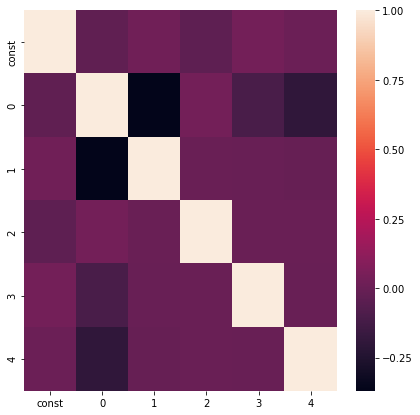

In [1044]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_params.corr())

In [1045]:
scaler = StandardScaler()
df_params_std = scaler.fit_transform(df_params)

risk_factor_pca = PCA()
risk_factor_pca.fit(df_params_std)
rfp = risk_factor_pca.transform(df_params_std)
rfp.shape

(750, 6)

Text(0, 0.5, 'Ratio of Variance Explanation')

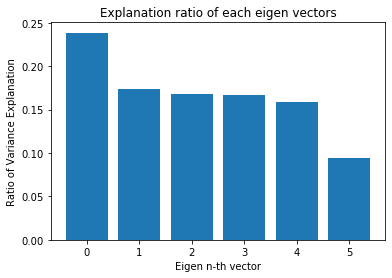

In [1046]:
eig_lim = len(risk_factor_pca.explained_variance_ratio_)
plt.bar(range(eig_lim), risk_factor_pca.explained_variance_ratio_[:eig_lim])
plt.title('Explanation ratio of each eigen vectors')
plt.xlabel('Eigen n-th vector')
plt.ylabel('Ratio of Variance Explanation')

#### Factor Loading의 P-value 공간 내에서의 Clustering

In [1047]:
df_pval = pd.DataFrame()
for ticker in df_return.columns:
    results = sm.OLS(df_return.loc[:,ticker] ,df_reg).fit()
    df_pval[ticker] = results.pvalues
df_pval = df_pval.T
df_pval

,const,0,1,2,3,4
A000020,1.0000,0.0000,0.0002,0.0000,0.0017,0.1822
A000040,1.0000,0.0012,0.0022,0.9185,0.2254,0.0193
A000050,1.0000,0.0000,0.1770,0.8425,0.1889,0.3229
A000060,1.0000,0.0001,0.0004,0.0000,0.9842,0.3664
A000070,1.0000,0.0000,0.1117,0.0003,0.0000,0.4686
...,...,...,...,...,...,...
A272550,1.0000,0.0000,0.0988,0.3779,0.1283,0.1015
A280360,1.0000,0.0000,0.0427,0.2608,0.8173,0.9749
A281820,1.0000,0.0000,0.0000,0.0532,0.0000,0.0498
A282330,1.0000,0.0002,0.0069,0.0000,0.0010,0.0000


In [1048]:
pd.DataFrame({'Mean': df_pval.mean(axis=0), 'Var': df_pval.var(axis=0)})

,Mean,Var
const,1.0000,0.0000
0,0.0074,0.0039
1,0.1411,0.0636
2,0.1953,0.0774
3,0.2500,0.0892
4,0.2589,0.0879


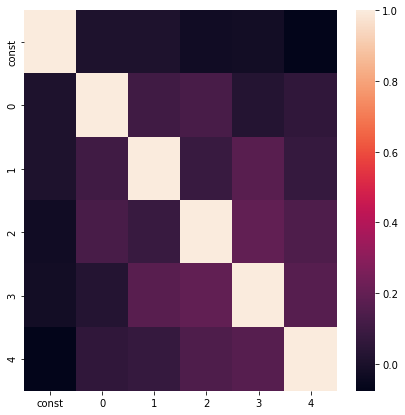

In [1049]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_pval.corr())

In [1050]:
scaler = StandardScaler()
df_pval_std = scaler.fit_transform(df_pval)

In [1051]:
risk_pval_pca = PCA()
risk_pval_pca.fit(df_pval_std)
rpp = risk_pval_pca.transform(df_pval_std)
rpp.shape

(750, 6)

Text(0, 0.5, 'Ratio of Variance Explanation')

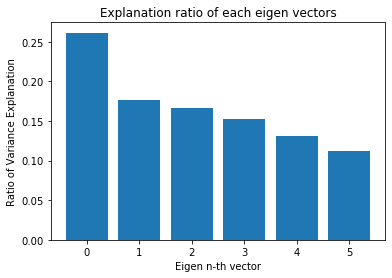

In [1052]:
eig_lim = len(risk_pval_pca.explained_variance_ratio_)
plt.bar(range(eig_lim), risk_pval_pca.explained_variance_ratio_[:eig_lim])
plt.title('Explanation ratio of each eigen vectors')
plt.xlabel('Eigen n-th vector')
plt.ylabel('Ratio of Variance Explanation')

#### tSNE 시각화를 통한 군집 확인

In [1053]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [1054]:
"""
df_eig_pval = pd.DataFrame()
eig_lim = 5
for i in range(eig_lim):
    df_eig_pval[i] = df_pval.mul(risk_pval_pca.components_[i]).sum(axis=1)
df_eig_pval
"""

'\ndf_eig_pval = pd.DataFrame()\neig_lim = 5\nfor i in range(eig_lim):\n    df_eig_pval[i] = df_pval.mul(risk_pval_pca.components_[i]).sum(axis=1)\ndf_eig_pval\n'

In [1055]:
df_eig_pval = pd.DataFrame(risk_pval_pca.transform(df_pval_std))
df_eig_pval.index = df_pval.index
df_eig_pval

,0,1,2,3,4,5
A000020,-1.1974,0.1914,0.2106,0.2961,0.0113,-0.3152
A000040,0.6103,0.1775,1.0066,-2.3123,-1.0361,-0.4961
A000050,1.2726,-0.2579,1.0071,-1.0211,-1.4759,1.1580
A000060,0.8085,-1.1811,-0.4644,-0.1867,2.1624,-0.3888
A000070,-0.5690,-0.0817,0.2528,1.0868,-0.2860,-0.2781
...,...,...,...,...,...,...
A272550,-0.1710,0.0798,0.3547,-0.5961,-0.5600,0.8900
A280360,1.9749,-1.7125,0.6321,0.8516,1.0330,-0.8778
A281820,-1.2881,0.3258,0.1547,-0.0957,-0.0503,0.0100
A282330,-1.4612,0.4316,-0.0240,-0.1207,0.0671,-0.1756


In [1056]:
tsne_obj= tsne.fit_transform(df_eig_pval.iloc[:, :5])

In [1057]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                       })#'digit':y})
tsne_df.head()

,X,Y
0,20.6034,-9.7098
1,-14.2533,-12.2651
2,-18.0166,-14.7896
3,-30.1297,3.0383
4,10.8630,-19.8083


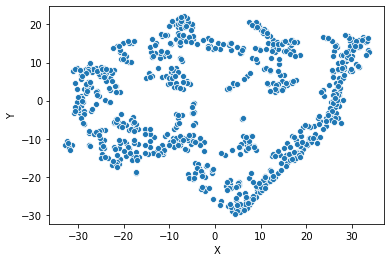

In [1058]:
sns.scatterplot(x="X", y="Y", data=tsne_df)

In [1059]:
wcss = []
cnum = 21
for i in range(1, cnum):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=1)
    kmeans_pca.fit(df_eig_pval.iloc[:, :5])
    wcss.append(kmeans_pca.inertia_)

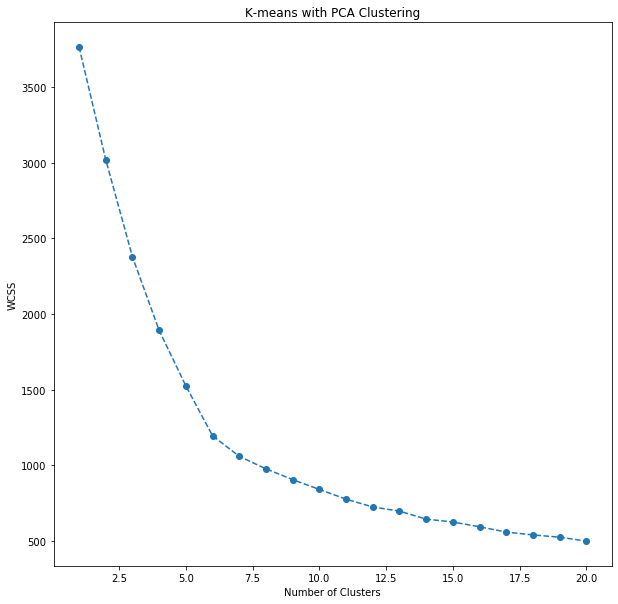

In [1060]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, cnum), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [1061]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state=1)
kmeans_pca.fit(df_eig_pval.iloc[:, :5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [1062]:
df_eig_pval_km = df_eig_pval.copy()
df_eig_pval_km['cluster'] = kmeans_pca.labels_
df_eig_pval_km

,0,1,2,3,4,5,cluster
A000020,-1.1974,0.1914,0.2106,0.2961,0.0113,-0.3152,1
A000040,0.6103,0.1775,1.0066,-2.3123,-1.0361,-0.4961,0
A000050,1.2726,-0.2579,1.0071,-1.0211,-1.4759,1.1580,0
A000060,0.8085,-1.1811,-0.4644,-0.1867,2.1624,-0.3888,2
A000070,-0.5690,-0.0817,0.2528,1.0868,-0.2860,-0.2781,1
...,...,...,...,...,...,...,...
A272550,-0.1710,0.0798,0.3547,-0.5961,-0.5600,0.8900,1
A280360,1.9749,-1.7125,0.6321,0.8516,1.0330,-0.8778,2
A281820,-1.2881,0.3258,0.1547,-0.0957,-0.0503,0.0100,1
A282330,-1.4612,0.4316,-0.0240,-0.1207,0.0671,-0.1756,1


In [1063]:
def tsne_visualize(df_obj):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_obj= tsne.fit_transform(df_obj)
    tsne_df = pd.DataFrame({'X':tsne_obj[:,0],'Y':tsne_obj[:,1]})
    sns.scatterplot(x='X', y='Y', data=tsne_df)

In [1064]:
tsne_obj= tsne.fit_transform(df_eig_pval.iloc[:, :5])
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'digit':df_eig_pval_km['cluster']})
tsne_df.head()

,X,Y,digit
A000020,20.6034,-9.7098,1
A000040,-14.2533,-12.2651,0
A000050,-18.0166,-14.7896,0
A000060,-30.1297,3.0383,2
A000070,10.8630,-19.8083,1


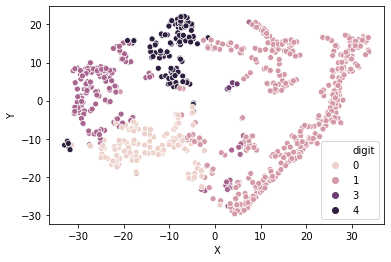

In [1065]:
sns.scatterplot(x="X", y="Y", hue="digit", data=tsne_df)

In [1066]:
df_pval.loc[df_eig_pval_km['cluster'] == 3,:]

,const,0,1,2,3,4
A002420,1.0000,0.7836,0.1979,0.3344,0.7389,0.7138
A002840,1.0000,0.4381,0.0406,0.8995,0.4948,0.5619
A009140,1.0000,0.6839,0.6537,0.7170,0.1102,0.9416
A009770,1.0000,0.8263,0.6656,0.6092,0.0345,0.0014
A010600,1.0000,0.4361,0.0028,0.0398,0.0372,0.0598
A013890,1.0000,0.3238,0.7114,0.6183,0.5912,0.0035
A023450,1.0000,0.6538,0.7627,0.8781,0.6306,0.4992
A033780,1.0000,0.3979,0.0025,0.0000,0.0483,0.2228


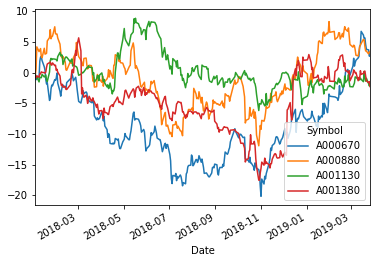

In [1067]:
df_return.loc[df_return.index[0:300], df_eig_pval_km['cluster']==2].cumsum().iloc[:, 3:7].plot()

### P value가 유의한 팩터들이 동일한 주식들 구분

In [1068]:
pval_thr = 0.05
df_pval_bool = df_pval < pval_thr
df_pval_bool

,const,0,1,2,3,4
A000020,False,True,True,True,True,False
A000040,False,True,True,False,False,True
A000050,False,True,False,False,False,False
A000060,False,True,True,True,False,False
A000070,False,True,False,True,True,False
...,...,...,...,...,...,...
A272550,False,True,False,False,False,False
A280360,False,True,True,False,False,False
A281820,False,True,True,False,True,True
A282330,False,True,True,True,True,True


In [1115]:
def classify_duplicate(df):
    df_c = df.copy()
    df_list = []
    df_non = pd.DataFrame()
    idx_list = df.index
    for idx in idx_list:
        if idx not in df_c.index:
            continue
        # print(idx)
        temp_df = pd.DataFrame()
        # temp_df[idx] = df_c.loc[idx,:]
        temp_series = df_c.loc[idx, :]
        df_c = df_c.drop(idx)
        cnt = 0
        for idx2 in df_c.index:
            if (temp_series == df_c.loc[idx2, :]).all():
                # print(idx, idx2)
                temp_df[idx2] = df_c.loc[idx2, :]
                df_c = df_c.drop(idx2)
                cnt += 1
        if cnt == 0:
            df_non[idx] = temp_series
        else:
            temp_df[idx] = temp_series
            df_list.append(temp_df.T)
    return df_list, df_non.T

In [1166]:
classified_list, df_nc = classify_duplicate(df_pval_bool)
print("Class Num: {} \nNotClass Records: {}".format(len(classified_list), len(df_nc)))

Class Num: 18 
NotClass Records: 6


In [1342]:
classified_list[1]

,const,0,1,2,3,4,cluster
A000390,False,True,True,False,False,True,1
A000950,False,True,True,False,False,True,1
A003080,False,True,True,False,False,True,1
A003570,False,True,True,False,False,True,2
A004430,False,True,True,False,False,True,0
A004840,False,True,True,False,False,True,1
A004910,False,True,True,False,False,True,1
A005720,False,True,True,False,False,True,2
A005740,False,True,True,False,False,True,1
A005750,False,True,True,False,False,True,1


In [1167]:
for i, d in enumerate(classified_list):
    print('{}th cluster: {}'.format(i+1, len(d)))

1th cluster: 68
2th cluster: 25
3th cluster: 81
4th cluster: 70
5th cluster: 18
6th cluster: 48
7th cluster: 105
8th cluster: 45
9th cluster: 95
10th cluster: 24
11th cluster: 31
12th cluster: 28
13th cluster: 44
14th cluster: 30
15th cluster: 13
16th cluster: 12
17th cluster: 5
18th cluster: 2


In [1168]:
sector_df.loc['중분류', classified_list[15].index]

A001750          금융 및 보험 관련 서비스업
A004100           자동차 및 트레일러 제조업
A004690    전기, 가스, 증기 및 공기조절 공급업
A005880                   수상 운송업
A006880              도매 및 상품 중개업
A007860                  전문 서비스업
A014440          고무 및 플라스틱제품 제조업
A023000           자동차 및 트레일러 제조업
A067830              소매업; 자동차 제외
A163560          고무 및 플라스틱제품 제조업
A200880           자동차 및 트레일러 제조업
A001620           자동차 및 트레일러 제조업
Name: 중분류, dtype: object

### 유의한 팩터가 동일한 주식끼리 팩터 로딩 클러스터링

In [1169]:
factor_sig

const      False
0           True
1          False
2          False
3           True
4          False
cluster        0
Name: A000320, dtype: object

In [1170]:
for d in classified_list[:10]:
    target_tickers = d.index
    factor_sig = d.iloc[0,:]
    k = factor_sig.sum()
    print(factor_sig)
    print(k)
    kmeans_pca = KMeans(n_clusters = k, init = 'k-means++', random_state=1)
    kmeans_pca.fit(df_params.loc[target_tickers, factor_sig])
    d['cluster'] = kmeans_pca.labels_

const    False
0         True
1         True
2         True
3         True
4        False
Name: A000520, dtype: bool
4
const    False
0         True
1         True
2        False
3        False
4         True
Name: A000390, dtype: bool
3
const    False
0         True
1        False
2        False
3        False
4        False
Name: A000140, dtype: bool
1
const    False
0         True
1         True
2         True
3        False
4        False
Name: A000210, dtype: bool
3
const    False
0         True
1        False
2         True
3         True
4        False
Name: A001020, dtype: bool
3
const    False
0         True
1         True
2         True
3        False
4         True
Name: A000240, dtype: bool
4
const    False
0         True
1         True
2         True
3         True
4         True
Name: A000220, dtype: bool
5
const    False
0         True
1        False
2         True
3        False
4        False
Name: A000150, dtype: bool
2
const    False
0         True
1         True
2  

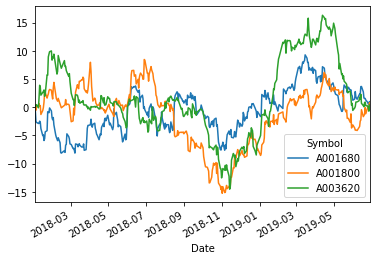

In [1239]:
df_return.loc[:, ['A001680', 'A001800', 'A003620']].cumsum().plot()

In [1390]:
i=6
a = df_return.loc[:,classified_list[i].index[classified_list[i]['cluster'] == 4]].iloc[:, :10]
sector_df.loc['중분류', a.columns]

A001820    전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
A002300               펄프, 종이 및 종이제품 제조업
A005420         화학물질 및 화학제품 제조업; 의약품 제외
A005680    전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
A007810    전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
A009150    전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
A013870                  자동차 및 트레일러 제조업
A014910    전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
A018470                       1차 금속 제조업
A020150    전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
Name: 중분류, dtype: object

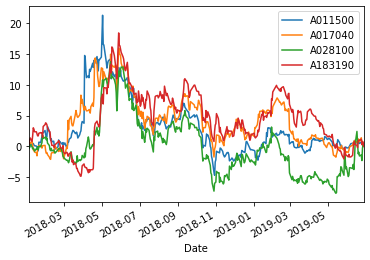

In [1384]:
a.cumsum().plot()

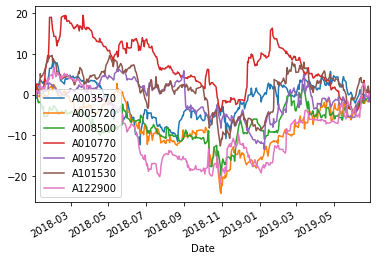

In [1188]:
i=1
df_return.loc[:,classified_list[i].index[classified_list[i]['cluster'] == 2]].cumsum().plot()